In [13]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [14]:
# XOR
X = np.array([ [0,0], [0,1], [1,0], [1,1] ])
y = np.array([0,1,1,0])

print(X)
print(y)

[[0 0]
 [0 1]
 [1 0]
 [1 1]]
[0 1 1 0]


In [15]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmderiv(u):
    return sigmoid(u) * (1 - sigmoid(u))

def sigmoideriv(y):
    return y * (1 - y)


In [16]:
# Forward propagation

def xor_nnet(X, W1, W2):
    # Транспонируем матрицу значений x1, x2 и добавляем к ней строку с x0 = 1
    x2 = np.vstack([np.ones((1, len(X))), X.T])

    # Рассчитываем выход второго слоя
    y2 = sigmoid(np.dot(W1, x2))

    # Добавляем 1 к получившейся матрце выходов второго слоя
    if len(y2) > 1:
        ones = np.ones(shape=(1, y2.shape[1]))
        x3 = np.vstack((ones, y2))
    else:
        x3 = np.array([1, y2[0], y2[1]])
    
    # Рассчитываем выход третьего слоя и нейроети в целом
    y3 = sigmoid(np.dot(W2, x3))

    # возвращаем матрицы выходов (и входов) каждого слоя
    return x2, x3, y3

In [17]:
np.random.seed(42)
hidden_size = 2

# Инициализируем веса случайным образом
W1 = 2 * np.random.random((hidden_size, 3)) - 1
W2 = 2 * np.random.random((1, hidden_size+1)) - 1

print(W1, W2)

[[-0.25091976  0.90142861  0.46398788]
 [ 0.19731697 -0.68796272 -0.68801096]] [[-0.88383278  0.73235229  0.20223002]]


In [18]:
# Вычисляем выход слоев нейросетей
x2, x3, ynet = xor_nnet(X, W1, W2)

print(x2)
print(x3)
print(ynet)

[[1. 1. 1. 1.]
 [0. 0. 1. 1.]
 [0. 1. 0. 1.]]
[[1.         1.         1.         1.        ]
 [0.43759713 0.55306642 0.65712512 0.75296649]
 [0.54916981 0.37973009 0.37974146 0.23529381]]
[[0.38881432 0.4008318  0.4192652  0.42927431]]


In [19]:
# вычислим ошибку классификации
err = y - ynet[0]
print('Ошибки нейросети:')
print(err)

# средний модуль ошибки (MAE)
print('MAE = {:6.2f}'.format(np.mean(np.abs(err))))

erro = np.round(err)
print('accuracy =', 100*(1-sum(np.abs(erro))/len(y)))

Ошибки нейросети:
[-0.38881432  0.5991682   0.5807348  -0.42927431]
MAE =   0.50
accuracy = 50.0


## Backpropagation

In [20]:
eta = 0.01
MAE_list = [np.mean(np.abs(err))]

for j in range(600_000):
    # проходим вперед по слоям 0, 1, 2
    y01, y02, y3 = xor_nnet(X, W1, W2)

    # как сильно мы ошиблись относительно нужной величины
    y3_error = y - y3[0]
    
    # распространим ошибку на выходе 3-го слоя на вход слоя
    u3_delta = y3_error * sigmoideriv(y3)

    # распространим ошибки z3 на ошибки выходов a2 (входы для a3)
    y02_error = np.dot(W2.T, u3_delta)
    
    # уберем 0-ю строку, содержащую добавленный +1
    y2 = y02[1:]
    y2_error = y02_error[1:]

    # распространим ошибку на выходе 2-го слоя на вход слоя
    u2_delta = y2_error * sigmoideriv(y2)

    # рассчитаем дельта весов каждого слоя
    dW2 = np.dot(u3_delta, y02.T)
    dW1 = np.dot(u2_delta, y01.T)

    W2 += eta * dW2
    W1 += eta * dW1

    if (j % 25000) == 0:
        MAE = np.round(np.mean(np.abs(y3_error)), 3)
        MAE_list.append(MAE)
        print('Error:', str(MAE))

print(W2)
print(W1)

Error: 0.499
Error: 0.397
Error: 0.168
Error: 0.095
Error: 0.071
Error: 0.059
Error: 0.051
Error: 0.045
Error: 0.041
Error: 0.038
Error: 0.036
Error: 0.033
Error: 0.032
Error: 0.03
Error: 0.029
Error: 0.028
Error: 0.027
Error: 0.026
Error: 0.025
Error: 0.024
Error: 0.023
Error: 0.023
Error: 0.022
Error: 0.021
[[-13.08861508   8.79030931   8.96182789]]
[[-3.20910601  7.1266329   7.1257329 ]
 [ 8.11368016 -5.41639931 -5.41621388]]


Text(0.5, 0, 'Тысяч эпох')

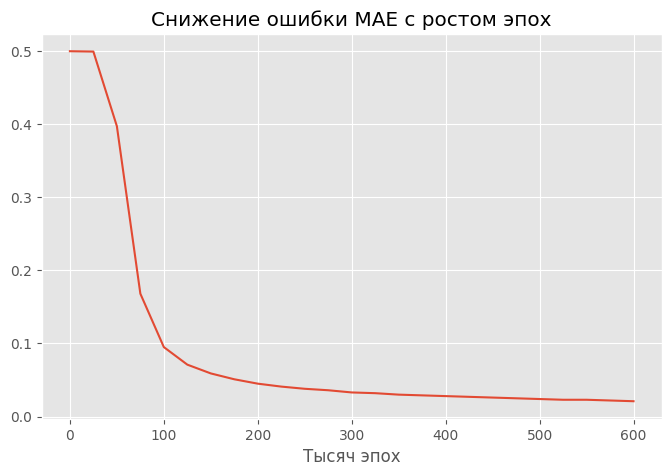

In [21]:
plt.figure(figsize=(8,5))
plt.plot(np.arange(0, 601, 25), MAE_list)
plt.title('Снижение ошибки MAE с ростом эпох')
plt.xlabel('Тысяч эпох')

In [22]:
# Вычисляем выход слоев нейросетей
x2, x3, ynet = xor_nnet(X, W1, W2)

print(x2)
print(x3)
print(ynet)

[[1. 1. 1. 1.]
 [0. 0. 1. 1.]
 [0. 1. 0. 1.]]
[[1.         1.         1.         1.        ]
 [0.03882448 0.98048046 0.98049768 0.99998401]
 [0.99970067 0.93687697 0.936866   0.06186536]]
[[0.02213546 0.98066363 0.98066463 0.02311201]]


In [23]:
# вычислим ошибку классификации
err = y - ynet[0]
print('Ошибки нейросети:')
print(err)

# средний модуль ошибки (MAE)
print('MAE = {:6.2f}'.format(np.mean(np.abs(err))))

erro = np.round(err)
print('accuracy =', 100*(1-sum(np.abs(erro))/len(y)))

Ошибки нейросети:
[-0.02213546  0.01933637  0.01933537 -0.02311201]
MAE =   0.02
accuracy = 100.0


---

In [24]:
X

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [25]:
np.ones((1, len(X)))

array([[1., 1., 1., 1.]])

In [26]:
x2 = np.vstack([np.ones((1, len(X))), X.T])
print(x2)

[[1. 1. 1. 1.]
 [0. 0. 1. 1.]
 [0. 1. 0. 1.]]


In [27]:
y2 = sigmoid(np.dot(W1, x2))
print(y2)

[[0.03882448 0.98048046 0.98049768 0.99998401]
 [0.99970067 0.93687697 0.936866   0.06186536]]
